In [29]:
import pandas as pd
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
import torch

from config.model_config import ModelConfig
from config.experiment_config import ExperimentConfig, AvailableDatasets
from vol_predict.features.preprocessor import OneToOnePreprocessor
from vol_predict.loss.loss import Loss

from vol_predict.models.dl.transformer_predictor import TransformerPredictor as Model
from vol_predict.models.dl.lstm_softplus_predictor import (
    LSTMSoftplusPredictor as Baseline,
)

from run import run_backtest, initialize_sequential_runner

In [31]:
config = ExperimentConfig()
config.DATASET = AvailableDatasets.BITCOIN

model_params = ModelConfig()
baseline_params = ModelConfig()

model_params.n_features = 1200
model_params.n_unique_features = 10

# Handles the features
feature_processor = OneToOnePreprocessor()

runner = initialize_sequential_runner(
    model_config=model_params,
    preprocessor=feature_processor,
    experiment_config=config,
)

Available data from 2018-06-04 23:00:00 to 2018-09-30 21:00:00


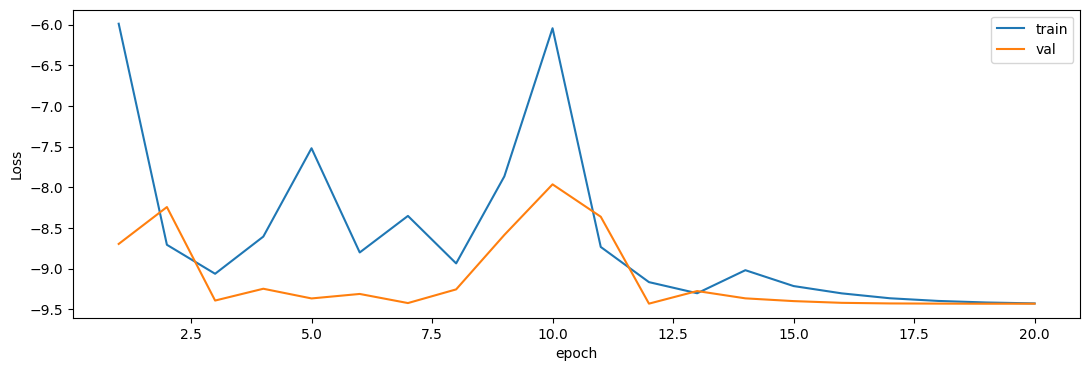

In [32]:
runner.model_config.lr = 1e-2
runner.model_config.n_epochs = 20
runner.model_config.hidden_size = 64
runner.model_config.n_layers = 3
runner.model_config.batch_size = 16
runner.model_config.optimizer = torch.optim.Adam
runner.model_config.loss = Loss.NLL
runner.model_config.dropout = 0.20

result = run_backtest(
    model_cls=Model,
    baseline_cls=Baseline,
    runner=runner,
)

In [33]:
result

,model_loss,baseline_loss,true_returns,true_vols,model_preds,baseline_preds
datetime,,,,,,
2018-06-30,-0.408127,-9.620058,"[-0.0026883667, -0.004259642, 0.0017928587, 0....","[0.00041156381, 0.0004322233, 0.00021497025, 0...","[0.664886, 0.664886, 0.664886, 0.664886, 0.664...","[5.4953973e-05, 5.7814836e-05, 5.7934038e-05, ..."
2018-07-03,-8.252933,-8.608952,[-0.008161686],[0.00024051484],[0.00017987064],[5.9006856e-05]
2018-07-04,2.315962,-9.032787,"[0.00045824194, 0.001279179, -0.00041435525, 0...","[0.00017250539, 0.00017690947, 0.00018171575, ...","[10.134608, 10.134664, 10.134623, 10.134636, 1...","[6.13909e-05, 6.13909e-05, 6.12717e-05, 6.1390..."
2018-07-05,-8.556475,-9.462177,"[-0.0025450767, 0.0020725208, -0.0004954421, -...","[0.00021121168, 0.0001595019, 0.00016921855, 0...","[0.00017760607, 0.00017772526, 0.00017760607, ...","[6.091409e-05, 6.2344516e-05, 6.1748506e-05, 6..."
2018-07-06,-8.809825,-9.490600,"[0.004517578, -0.0020303084, -0.0006618499, -0...","[7.636556e-05, 6.373772e-05, 0.00017979922, 8....","[0.00013553178, 0.00013553178, 0.00013553178, ...","[6.1152496e-05, 6.0675688e-05, 6.1152496e-05, ..."
...,...,...,...,...,...,...
2018-09-26,-9.234242,-10.044114,"[0.0008025224, -0.0018516219, 0.0015779294, 0....","[1.0667841e-05, 1.7913802e-05, 4.319444e-06, 4...","[8.5707805e-05, 8.5707805e-05, 8.5707805e-05, ...","[2.9921084e-05, 2.9801879e-05, 2.9921084e-05, ..."
2018-09-27,-0.406690,-9.559533,"[0.0025939993, -0.0004280163, -0.003148001, -0...","[1.11729005e-05, 7.5437806e-06, 8.304065e-06, ...","[0.66582465, 0.66582465, 0.66582465, 0.6658246...","[2.9563467e-05, 2.9325056e-05, 2.9444262e-05, ..."
2018-09-28,-9.010862,-9.785958,"[-0.0022302242, 0.00031208308, 0.0011399924, 0...","[4.492918e-05, 1.22871825e-05, 6.9373027e-06, ...","[0.00010096517, 0.00010096517, 0.00010096517, ...","[2.9086643e-05, 2.9325056e-05, 2.920585e-05, 2..."


In [34]:
import pandas as pd
from sklearn.metrics import root_mean_squared_error

rmse = []
for (date, row) in result.iterrows():
    rmse.append([date, root_mean_squared_error(row.true_vols, row.model_preds), root_mean_squared_error(row.true_vols, row.baseline_preds)])

rmse = pd.DataFrame(rmse, columns=["date", "model", "baseline"]).set_index("date")

In [35]:
rmse.mean(axis=0)

model       0.901458
baseline    0.000154
dtype: float64

In [36]:
rmse.std(axis=0)

model       2.535603
baseline    0.000180
dtype: float64

In [37]:
result.to_csv(f"Daily_Fixed_Transf_results_{runner.model_config.n_epochs}.csv")